In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from math import sqrt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


from google.colab import drive

#Mount google drive
drive.mount('/content/drive', force_remount=True)

#Define File path
df_train= pd.read_csv('/content/drive/MyDrive/ADSA010/Kaggle/MultiClassClassification/train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/ADSA010/Kaggle/MultiClassClassification/test.csv')


Mounted at /content/drive


In [ ]:
df_train.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000
mean,2436.000000,7.216838,0.339137,0.319142,5.416284,0.055545,30.624153,115.820029,0.994654,3.218518,0.530663,10.516800,5.835830
std,1406.858261,1.293293,0.163757,0.143703,4.761122,0.033238,17.867987,56.295513,0.003019,0.160959,0.147317,1.202623,0.880908
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1218.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992240,3.110000,0.430000,9.500000,5.000000
50%,2436.000000,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.400000,6.000000
75%,3654.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.500000,156.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,4872.000000,15.900000,1.330000,1.230000,65.800000,0.467000,289.000000,440.000000,1.038980,4.010000,1.980000,14.900000,9.000000


In [ ]:
df_test.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,508.500000,6.923870,0.301896,0.315265,6.197446,0.051143,33.275049,128.140963,0.994326,3.194528,0.508448,10.469971
std,294.015589,1.073908,0.130843,0.133297,4.999842,0.034305,17.360385,49.703882,0.003048,0.157040,0.136064,1.217858
min,0.000000,3.900000,0.080000,0.000000,0.600000,0.014000,3.000000,8.000000,0.987130,2.740000,0.260000,8.400000
25%,254.250000,6.300000,0.220000,0.250000,1.862500,0.037000,20.000000,97.000000,0.991860,3.090000,0.420000,9.400000
50%,508.500000,6.800000,0.270000,0.300000,4.800000,0.045000,31.000000,126.000000,0.994400,3.180000,0.480000,10.300000
75%,762.750000,7.400000,0.340000,0.370000,9.237500,0.053000,44.000000,161.000000,0.996600,3.290000,0.580000,11.300000
max,1017.000000,14.200000,1.025000,1.660000,31.600000,0.610000,146.500000,307.500000,1.010300,3.790000,2.000000,14.200000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4873 entries, 0 to 4872
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    4873 non-null   int64  
 1   fixed acidity         4873 non-null   float64
 2   wine type             4873 non-null   object 
 3   volatile acidity      4873 non-null   float64
 4   citric acid           4873 non-null   float64
 5   residual sugar        4873 non-null   float64
 6   chlorides             4873 non-null   float64
 7   free sulfur dioxide   4873 non-null   float64
 8   total sulfur dioxide  4873 non-null   float64
 9   density               4873 non-null   float64
 10  pH                    4873 non-null   float64
 11  sulphates             4873 non-null   float64
 12  alcohol               4873 non-null   float64
 13  quality               4873 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 533.1+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1018 non-null   int64  
 1   fixed acidity         1018 non-null   float64
 2   wine type             1018 non-null   object 
 3   volatile acidity      1018 non-null   float64
 4   citric acid           1018 non-null   float64
 5   residual sugar        1018 non-null   float64
 6   chlorides             1018 non-null   float64
 7   free sulfur dioxide   1018 non-null   float64
 8   total sulfur dioxide  1018 non-null   float64
 9   density               1018 non-null   float64
 10  pH                    1018 non-null   float64
 11  sulphates             1018 non-null   float64
 12  alcohol               1018 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 103.5+ KB


In [ ]:
df_train.shape

(4873, 14)

In [ ]:
df_test.shape

(1018, 13)

In [ ]:
df_train.columns

Index(['ID', 'fixed acidity', 'wine type', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
df_test.columns

Index(['ID', 'fixed acidity', 'wine type', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
df_train_cleaned = df_train

In [ ]:
df_train_cleaned.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [ ]:
df_train_cleaned.columns

Index(['ID', 'fixed acidity', 'wine type', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
df_train_cleaned.head()

,ID,fixed acidity,wine type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,9.0,white,0.27,0.35,4.9,0.028,27.0,95.0,0.99320,3.04,0.40,11.3,6
1,1,7.1,white,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7
2,2,6.4,white,0.18,0.48,4.0,0.186,64.0,150.0,0.99450,3.06,0.40,9.3,5
3,3,6.7,white,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.4,6
4,4,6.2,white,0.25,0.31,3.2,0.030,32.0,150.0,0.99014,3.18,0.31,12.0,6


In [ ]:
df_test_cleaned = df_test

In [ ]:
df_test_cleaned.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [ ]:
df_test_cleaned.columns

Index(['ID', 'fixed acidity', 'wine type', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
df_test_cleaned.head()

,ID,fixed acidity,wine type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,red,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
1,1,7.7,red,0.67,0.23,2.1,0.088,17.0,96.0,0.9962,3.32,0.48,9.5
2,2,6.9,red,0.55,0.15,2.2,0.076,19.0,40.0,0.9961,3.41,0.59,10.1
3,3,7.0,red,0.62,0.08,1.8,0.076,8.0,24.0,0.9978,3.48,0.53,9.0
4,4,7.6,red,0.90,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8


In [ ]:
corr_mat = df_train_cleaned.corr()
print(corr_mat)

                            ID  fixed acidity  volatile acidity  citric acid  \
ID                    1.000000       0.017756          0.003908     0.002963   
fixed acidity         0.017756       1.000000          0.211823     0.320238   
volatile acidity      0.003908       0.211823          1.000000    -0.382733   
citric acid           0.002963       0.320238         -0.382733     1.000000   
residual sugar        0.010306      -0.111137         -0.188832     0.143833   
chlorides             0.007325       0.305783          0.374053     0.025231   
free sulfur dioxide  -0.006201      -0.285851         -0.360109     0.125599   
total sulfur dioxide -0.007639      -0.337909         -0.423124     0.186169   
density               0.021986       0.454972          0.272221     0.094680   
pH                   -0.009608      -0.255299          0.267199    -0.325411   
sulphates            -0.019497       0.291808          0.217208     0.052716   
alcohol              -0.016855      -0.0

<ipython-input-276-2fc50ca59488>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_train_cleaned.corr()


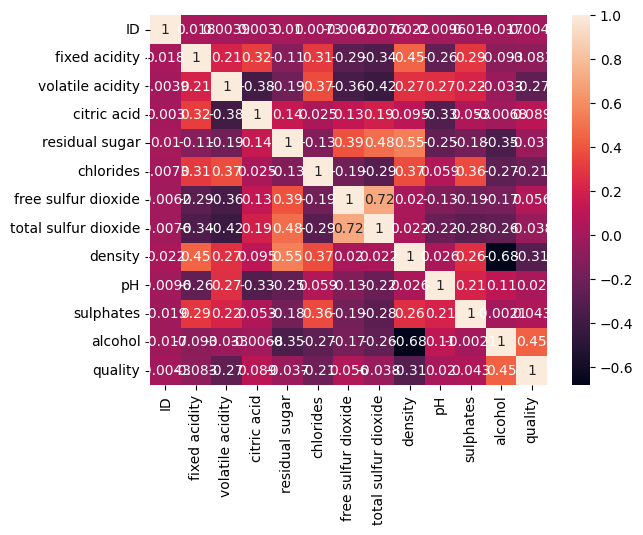

In [ ]:
train_corr = sns.heatmap(corr_mat, annot=True)

In [ ]:
unwanted_features=['ID','volatile acidity', 'chlorides','density']

In [ ]:
df_train_cleaned2 = df_train_cleaned.drop(columns=unwanted_features, axis=1)
df_train_cleaned2.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [ ]:
df_train_cleaned2.head()

,fixed acidity,wine type,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,9.0,white,0.35,4.9,27.0,95.0,3.04,0.40,11.3,6
1,7.1,white,0.37,4.8,39.0,114.0,3.08,0.49,12.7,7
2,6.4,white,0.48,4.0,64.0,150.0,3.06,0.40,9.3,5
3,6.7,white,0.49,1.6,20.0,94.0,3.11,0.50,11.4,6
4,6.2,white,0.31,3.2,32.0,150.0,3.18,0.31,12.0,6


In [ ]:
df_test_cleaned2 = df_test_cleaned.drop(columns=unwanted_features, axis=1)
df_test_cleaned2.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [ ]:
df_test_cleaned2.head()

,fixed acidity,wine type,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,red,0.00,1.8,13.0,40.0,3.51,0.56,9.4
1,7.7,red,0.23,2.1,17.0,96.0,3.32,0.48,9.5
2,6.9,red,0.15,2.2,19.0,40.0,3.41,0.59,10.1
3,7.0,red,0.08,1.8,8.0,24.0,3.48,0.53,9.0
4,7.6,red,0.06,2.5,5.0,10.0,3.39,0.56,9.8


In [ ]:
def encode_onehot(df,features_encode):
    dummies = pd.get_dummies(df[features_encode])
    df=df.drop(columns=features_to_encode,axis=1)
    output=pd.concat([df,dummies*1],axis=1)
    return(output)


In [ ]:
features_to_encode = ['wine type']

In [ ]:
df_train_encoded=encode_onehot(df_train_cleaned2,features_to_encode)

In [ ]:
df_train_encoded.shape

(4873, 11)

In [ ]:
df_test_encoded=encode_onehot(df_test_cleaned2,features_to_encode)

In [ ]:
df_test_encoded.shape

(1018, 10)

In [ ]:
corr_mat2 = df_train_cleaned2.corr()
print(corr_mat2)

                      fixed acidity  citric acid  residual sugar  \
fixed acidity              1.000000     0.320238       -0.111137   
citric acid                0.320238     1.000000        0.143833   
residual sugar            -0.111137     0.143833        1.000000   
free sulfur dioxide       -0.285851     0.125599        0.392716   
total sulfur dioxide      -0.337909     0.186169        0.483920   
pH                        -0.255299    -0.325411       -0.252373   
sulphates                  0.291808     0.052716       -0.178831   
alcohol                   -0.093145    -0.006753       -0.347156   
quality                   -0.082934     0.089055       -0.036536   

                      free sulfur dioxide  total sulfur dioxide        pH  \
fixed acidity                   -0.285851             -0.337909 -0.255299   
citric acid                      0.125599              0.186169 -0.325411   
residual sugar                   0.392716              0.483920 -0.252373   
free sulfur

<ipython-input-316-093d79baf59f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat2 = df_train_cleaned2.corr()


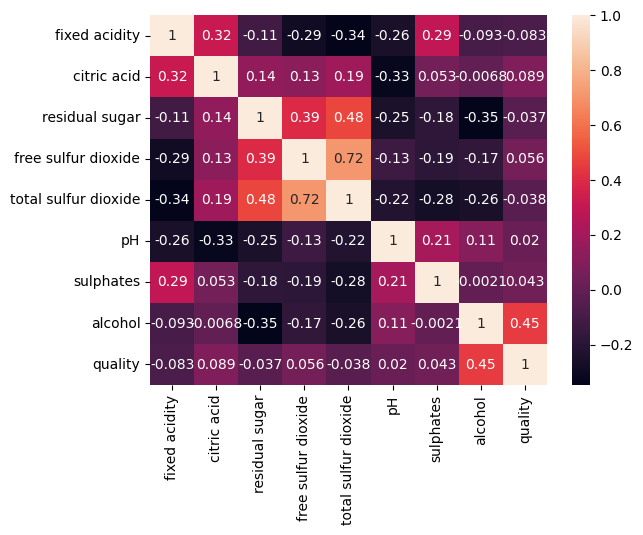

In [ ]:
train_corr2 = sns.heatmap(corr_mat2, annot=True)

In [ ]:
X = df_train_encoded.loc[:,df_train_encoded.columns!='quality']
Y = df_train_encoded[['quality']]

print(X.shape,Y.shape)

(4873, 10) (4873, 1)


In [ ]:
test= df_test_encoded.loc[:,:]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=104,train_size=0.9,shuffle=True)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4385, 10)
(4385, 1)
(488, 10)
(488, 1)


In [ ]:
std_scaler = StandardScaler()

In [ ]:
model = GaussianNB()
# train the model
model.fit(X_train, Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.score(X_test,Y_test)

0.46311475409836067

In [ ]:
df_final= pd.DataFrame(y_test_pred)

In [ ]:
print(df_final.shape)

(1018, 1)


In [ ]:
df_final.reset_index()

,index,0
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
1013,1013,5
1014,1014,6
1015,1015,6
1016,1016,6


In [ ]:
df_final1= df_final.reset_index()

In [ ]:
df_final1.head()

,index,0
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5


In [ ]:
import pandas as pd
df_final1.rename(columns = {'index':'ID','0':'quality'}, inplace = True)

In [ ]:
df_final1.columns

Index(['ID', 0], dtype='object')

In [ ]:
df_final1.to_csv('/content/drive/MyDrive/ADSA010/Kaggle/MultiClassClassification/AshwinBRMultiClassificationFinalSubmission3.csv',index=False)